# Ruína do Jogador (Gambler's Ruin)

### Bibliotecas usadas: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Matriz de Transição: 

In [14]:
def gerarMatriz(ganho, N):
    perda = 1 - ganho
    Transicao = np.diag(perda*np.ones(N), k=-1) + np.diag(ganho*np.ones(N), k=1) 
    Transicao[0, :] = 0
    Transicao[0, 0] = 1
    Transicao[N, :] = 0
    Transicao[N, N] = 1
    return Transicao

porcent = float(input('Porcentagem:'))
tamMatriz = int(input('Valor Máximo:'))
mTransicao = gerarMatriz(porcent,tamMatriz)
print("\nMatriz de Transição\n")
print(mTransicao)

Porcentagem: 0.4
Valor Máximo: 8



Matriz de Transição

[[1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.4 0.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0.  0.  0.  0. ]
 [0.  0.  0.6 0.  0.4 0.  0.  0.  0. ]
 [0.  0.  0.  0.6 0.  0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  0.6 0.  0.4 0. ]
 [0.  0.  0.  0.  0.  0.  0.6 0.  0.4]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


### Forma Canônica:


In [15]:
A = [0, tamMatriz]
B = range(1, tamMatriz)

identidade = mTransicao[np.ix_(A, A)]
matrizR = mTransicao[np.ix_(B, A)]
matrizQ = mTransicao[np.ix_(B, B)]
print("\nMatriz Identidade\n")
print(identidade,"\n")
print("\nMatriz R\n")
print(matrizR,"\n")
print("\nMatriz Q de estados transientes\n")
print(matrizQ,"\n")


Matriz Identidade

[[1. 0.]
 [0. 1.]] 


Matriz R

[[0.6 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.4]] 


Matriz Q de estados transientes

[[0.  0.4 0.  0.  0.  0.  0. ]
 [0.6 0.  0.4 0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0.  0. ]
 [0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.6 0.  0.4 0. ]
 [0.  0.  0.  0.  0.6 0.  0.4]
 [0.  0.  0.  0.  0.  0.6 0. ]] 



### Matriz Fundamental:


In [16]:
np.set_printoptions(suppress= True,precision=3) #arrendodamento dos números 
F= (np.eye(len(matrizQ)))
K= np.subtract(F,matrizQ)
Y= np.linalg.inv(K)
print("Matriz fundamental\n")
print(Y)

Matriz fundamental

[[1.633 1.055 0.669 0.412 0.241 0.127 0.051]
 [1.582 2.637 1.673 1.031 0.603 0.317 0.127]
 [1.506 2.51  3.179 1.959 1.145 0.603 0.241]
 [1.392 2.32  2.938 3.351 1.959 1.031 0.412]
 [1.22  2.034 2.577 2.938 3.179 1.673 0.669]
 [0.964 1.606 2.034 2.32  2.51  2.637 1.055]
 [0.578 0.964 1.22  1.392 1.506 1.582 1.633]]


### Vetor t :

In [17]:
vetorT = Y.sum(axis=1)
print("Vetor t transposto:\n")
print(vetorT)

Vetor t transposto:

[ 4.188  7.97  11.143 13.402 14.291 13.125  8.875]


### Matriz B:

In [18]:
matrizB = np.dot(Y,matrizR)
print("\nMatriz B\n")
print(matrizB)


Matriz B

[[0.98  0.02 ]
 [0.949 0.051]
 [0.904 0.096]
 [0.835 0.165]
 [0.732 0.268]
 [0.578 0.422]
 [0.347 0.653]]


### Autovalores e Autovetores :


In [19]:
autovalores, autovetores = np.linalg.eig(mTransicao.T)
print("Autovalores:\n")
print(autovalores,"\n")
print("Autovetores normalizados:\n")
print(autovetores)

Autovalores:

[ 1.     1.    -0.905 -0.693 -0.375  0.375  0.905  0.693  0.   ] 

Autovetores normalizados:

[[ 1.     0.     0.101 -0.191 -0.294  0.557 -0.885 -0.723 -0.414]
 [ 0.     0.    -0.321  0.538  0.673 -0.58   0.14   0.37   0.689]
 [ 0.     0.     0.485 -0.621 -0.42  -0.363  0.211  0.428 -0.   ]
 [ 0.     0.    -0.517  0.359 -0.186  0.16   0.225  0.247 -0.46 ]
 [ 0.     0.     0.457  0.     0.396  0.342  0.199 -0.    -0.   ]
 [ 0.     0.    -0.345 -0.239 -0.124  0.107  0.15  -0.165  0.306]
 [ 0.     0.     0.215  0.276 -0.187 -0.161  0.094 -0.19  -0.   ]
 [ 0.     0.    -0.095 -0.159  0.199 -0.172  0.041 -0.11  -0.204]
 [ 0.     1.     0.02   0.038 -0.058  0.11  -0.175  0.143  0.082]]


### Decomposição Espectral: 

Matriz S (Autovetores):

In [20]:
print("Matriz S:\n")
print(autovetores)

Matriz S:

[[ 1.     0.     0.101 -0.191 -0.294  0.557 -0.885 -0.723 -0.414]
 [ 0.     0.    -0.321  0.538  0.673 -0.58   0.14   0.37   0.689]
 [ 0.     0.     0.485 -0.621 -0.42  -0.363  0.211  0.428 -0.   ]
 [ 0.     0.    -0.517  0.359 -0.186  0.16   0.225  0.247 -0.46 ]
 [ 0.     0.     0.457  0.     0.396  0.342  0.199 -0.    -0.   ]
 [ 0.     0.    -0.345 -0.239 -0.124  0.107  0.15  -0.165  0.306]
 [ 0.     0.     0.215  0.276 -0.187 -0.161  0.094 -0.19  -0.   ]
 [ 0.     0.    -0.095 -0.159  0.199 -0.172  0.041 -0.11  -0.204]
 [ 0.     1.     0.02   0.038 -0.058  0.11  -0.175  0.143  0.082]]


Λ uma matriz diagonal com os autovalores da matriz de transição transposta

In [21]:
matrizdiagonal = np.diag(autovalores)
print("Matriz Λ:\n")
print(matrizdiagonal)

Matriz Λ:

[[ 1.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.905  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.693  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.375  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.375  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.905  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.693  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.   ]]


Matriz S (inversa):

In [22]:
sInversa =np.linalg.inv(autovetores)
print("Matriz S inversa:\n")
print(sInversa)

Matriz S inversa:

[[ 1.     0.98   0.949  0.904  0.835  0.732  0.578  0.347  0.   ]
 [ 0.     0.02   0.051  0.096  0.165  0.268  0.422  0.653  1.   ]
 [-0.    -0.114  0.258 -0.413  0.547 -0.619  0.58  -0.384 -0.   ]
 [-0.     0.232 -0.403  0.349  0.    -0.523  0.906 -0.784 -0.   ]
 [ 0.     0.317 -0.297 -0.197  0.631 -0.296 -0.669  1.071  0.   ]
 [-0.    -0.368 -0.345  0.228  0.731  0.343 -0.776 -1.241 -0.   ]
 [ 0.     0.262  0.593  0.949  1.258  1.423  1.334  0.884  0.   ]
 [-0.     0.338  0.585  0.506  0.    -0.759 -1.315 -1.139 -0.   ]
 [-0.     0.363  0.    -0.544 -0.     0.816 -0.    -1.224 -0.   ]]


SΛS^(-1):

In [23]:
result = np.matmul(np.matmul(autovetores,matrizdiagonal),np.linalg.inv(autovetores))
print(result)

[[ 1.   0.6 -0.  -0.   0.  -0.   0.   0.   0. ]
 [ 0.  -0.   0.6  0.  -0.   0.   0.   0.   0. ]
 [ 0.   0.4 -0.   0.6  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.4  0.   0.6  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.4 -0.   0.6 -0.   0.   0. ]
 [ 0.   0.   0.   0.   0.4 -0.   0.6  0.   0. ]
 [ 0.  -0.  -0.   0.   0.   0.4 -0.   0.6  0. ]
 [ 0.   0.   0.   0.   0.  -0.   0.4  0.   0. ]
 [ 0.  -0.  -0.  -0.   0.  -0.  -0.   0.4  1. ]]


# SIMULAÇÃO GAMBLER'S RUIN: 

Valor Inicial: 4



 [4, 3, 2, 3, 2, 1, 0]


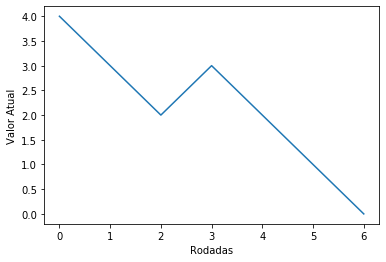

In [29]:
tabela=[]
while True:
    vI = int(input('Valor Inicial:'))
    if (vI>=tamMatriz or vI<=0):
        print('Valor Inválido')
    else:
        valor_atual=vI
        tabela.append(valor_atual)
        break
while True:
    aleatorio = random.random()
    if (aleatorio > matrizB[vI-1][1]):
        valor_atual-=1
        tabela.append(valor_atual)
    else:
        valor_atual+=1
        tabela.append(valor_atual)
    if (valor_atual == tamMatriz or valor_atual == 0):
        break
print("\n",tabela)
plt.plot(tabela)
plt.xlabel("Rodadas")
plt.ylabel("Valor Atual")
plt.show()